# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 11</span>

### Es 11.1

In questo esercizio andiamo a studiare la capacità delle reti neurali di andare a fare un fit di una funzione che ha come dominio e codominio l'insieme dei reali. 

Fissata una funzione $f(x)$, che in questo caso è una retta, si va a generare due set di dati $(x,y)$ con $y=f(x)+\eta$ in cui $\eta$ è un parametro che induce un rumore Gaussiano. Il primo set (train), che è quello più corposo, serve per apprendere mentre il secondo (validation) ci permette di valutare l'errore commesso.

La rete considerata è costituita da un singolo neurone.Nei punti seguenti viene mostrato come si comporta la rete se andiamo a cambiare la $\sigma$ del rumore Gaussiano, $N_{epoch}$ ed $N_{train}$

Per ovvie ragioni il il dominio della funzione è stato limitato all'intervallo $[-1,1]$.

#### Sigma

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

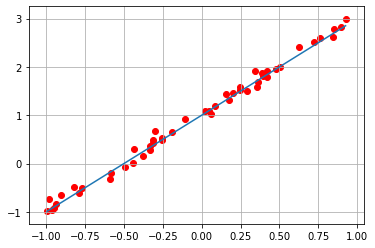

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 1ms/sample - loss: 0.8924 - mae: 0.8542 - val_loss: 0.6658 - val_mae: 0.7315
Epoch 2/30
500/500 [==============================] - 0s 318us/sample - loss: 0.5160 - mae: 0.6206 - val_loss: 0.3961 - val_mae: 0.5400
Epoch 3/30
500/500 [==============================] - 0s 234us/sample - loss: 0.3095 - mae: 0.4632 - val_loss: 0.2469 - val_mae: 0.4157
Epoch 4/30
500/500 [==============================] - 0s 396us/sample - loss: 0.1951 - mae: 0.3602 - val_loss: 0.1610 - val_mae: 0.3310
Epoch 5/30
500/500 [==============================] - 0s 223us/sam

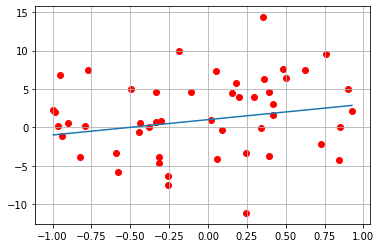

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 1ms/sample - loss: 29.8540 - mae: 4.3214 - val_loss: 27.7377 - val_mae: 4.2009
Epoch 2/30
500/500 [==============================] - 0s 701us/sample - loss: 28.2789 - mae: 4.2102 - val_loss: 26.6948 - val_mae: 4.1158
Epoch 3/30
500/500 [==============================] - 0s 259us/sample - loss: 27.1611 - mae: 4.1251 - val_loss: 25.9993 - val_mae: 4.0614
Epoch 4/30
500/500 [==============================] - 0s 263us/sample - loss: 26.3360 - mae: 4.0656 - val_loss: 25.5095 - val_mae: 4.0151
Epoch 5/30
500/500 [==============================] - 0s 4

In [45]:


# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = [0.1,5] # noise standard deviation, for the moment it is absent


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))


y_train = np.random.normal(m * x_train + b, sigma[0]) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma[0])
plt.plot(x_valid, y_target) # plot training and target dataset
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show()
   


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
batch_size=32, epochs=30,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
###################################################################à

y_train = np.random.normal(m * x_train + b, sigma[1]) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(m * x_valid + b, sigma[1])
plt.plot(x_valid, y_target) # plot training and target dataset
plt.scatter(x_valid, y_valid2, color='r')
plt.grid(True); 
plt.show()
   

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model2.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train, y=y_train, 
batch_size=32, epochs=30,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid2))
# evaluate model
score2 = model2.evaluate(x_valid, y_valid2, batch_size=32, verbose=0)
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model.predict(x_predicted2)
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

_____sigma=0.1____
Test loss: 0.011164723001420497
Test accuracy: 0.08279357


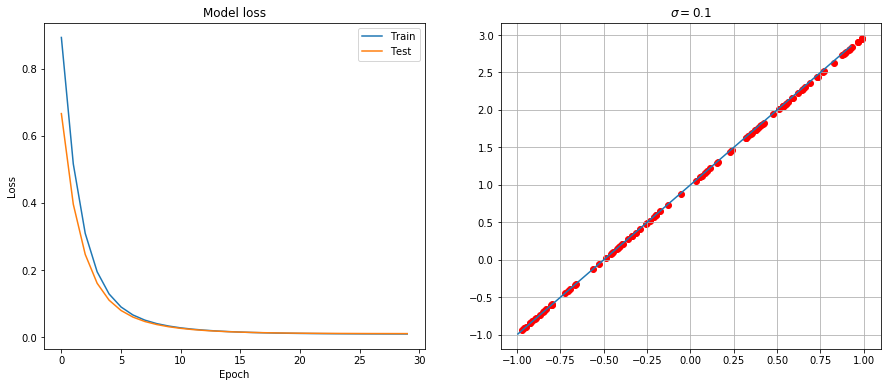

____sigma=5____
Test loss: 24.763210678100585
Test accuracy: 3.9838061


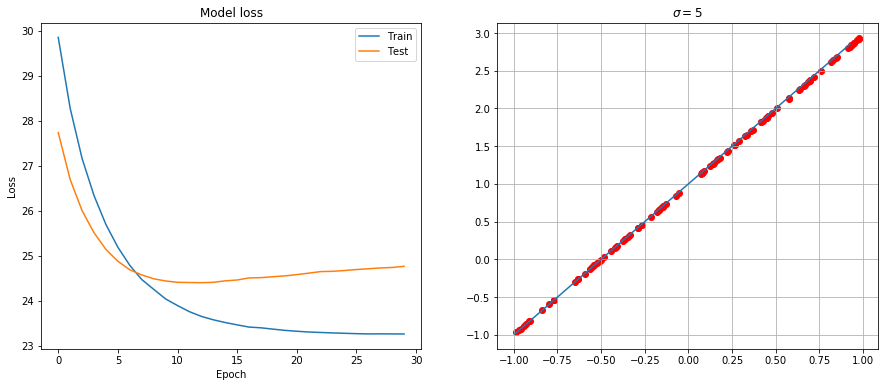

In [47]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
print('_____sigma=0.1____')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
  

plt.subplot(122)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('$\sigma=0.1$')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
print('____sigma=5____')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

plt.subplot(122)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('$\sigma=5$')
plt.show()

#### Epoch

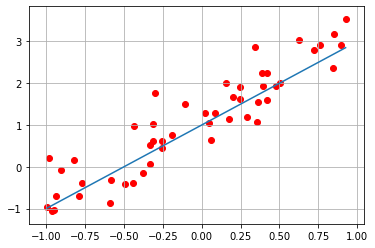

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 1ms/sample - loss: 4.5309 - mae: 1.7519 - val_loss: 3.7557 - val_mae: 1.6368
Epoch 2/30
500/500 [==============================] - 0s 209us/sample - loss: 3.5119 - mae: 1.5482 - val_loss: 2.9339 - val_mae: 1.4473
Epoch 3/30
500/500 [==============================] - 0s 275us/sample - loss: 2.7727 - mae: 1.3777 - val_loss: 2.3416 - val_mae: 1.2925
Epoch 4/30
500/500 [==============================] - 0s 253us/sample - loss: 2.2295 - mae: 1.2372 - val_loss: 1.9006 - val_mae: 1.1614
Epoch 5/30
500/500 [==============================] - 0s 267us/sam

Epoch 23/100
500/500 [==============================] - 0s 176us/sample - loss: 0.2451 - mae: 0.3911 - val_loss: 0.2778 - val_mae: 0.4071
Epoch 24/100
500/500 [==============================] - 0s 172us/sample - loss: 0.2451 - mae: 0.3911 - val_loss: 0.2785 - val_mae: 0.4073
Epoch 25/100
500/500 [==============================] - 0s 161us/sample - loss: 0.2449 - mae: 0.3912 - val_loss: 0.2788 - val_mae: 0.4073
Epoch 26/100
500/500 [==============================] - 0s 158us/sample - loss: 0.2449 - mae: 0.3912 - val_loss: 0.2796 - val_mae: 0.4077
Epoch 27/100
500/500 [==============================] - 0s 162us/sample - loss: 0.2450 - mae: 0.3912 - val_loss: 0.2790 - val_mae: 0.4070
Epoch 28/100
500/500 [==============================] - 0s 167us/sample - loss: 0.2448 - mae: 0.3914 - val_loss: 0.2783 - val_mae: 0.4063
Epoch 29/100
500/500 [==============================] - 0s 181us/sample - loss: 0.2447 - mae: 0.3913 - val_loss: 0.2786 - val_mae: 0.4063
Epoch 30/100
500/500 [============

In [39]:
#Nepoch=30
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent





y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
plt.plot(x_valid, y_target) # plot training and target dataset
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show()
   

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
batch_size=32, epochs=30,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
###################################################################à
#Nepoch=100

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model2.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train, y=y_train, 
batch_size=32, epochs=100,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

#######################################################################
# Nepoch=3


   
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model3.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history3 = model3.fit(x=x_train, y=y_train, 
batch_size=32, epochs=3,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted3 = np.random.uniform(-1, 1, 100)
y_predicted3 = model3.predict(x_predicted3)
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])


_____N_epoch=30____
Test loss: 0.2803016448020935
Test accuracy: 0.4146402


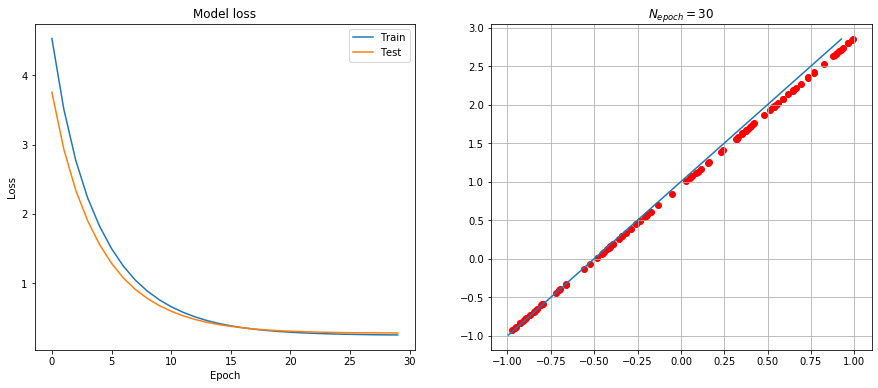

____N_epoch=100____
Test loss: 0.27892837405204773
Test accuracy: 0.40520012


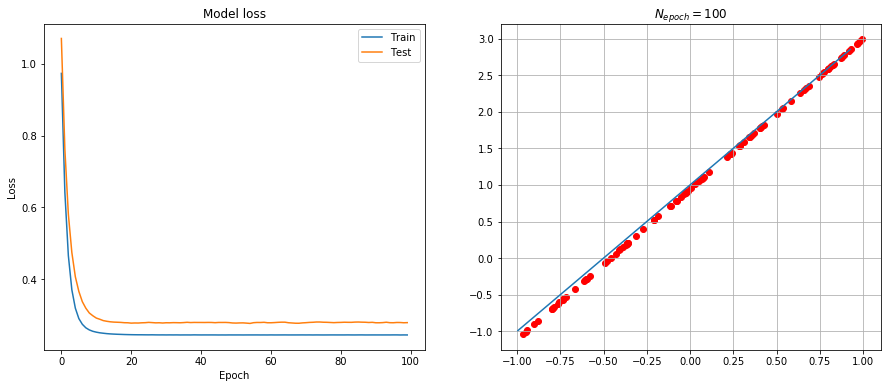

____N_epoch=5____
Test loss: 2.3568939781188964
Test accuracy: 1.2968547


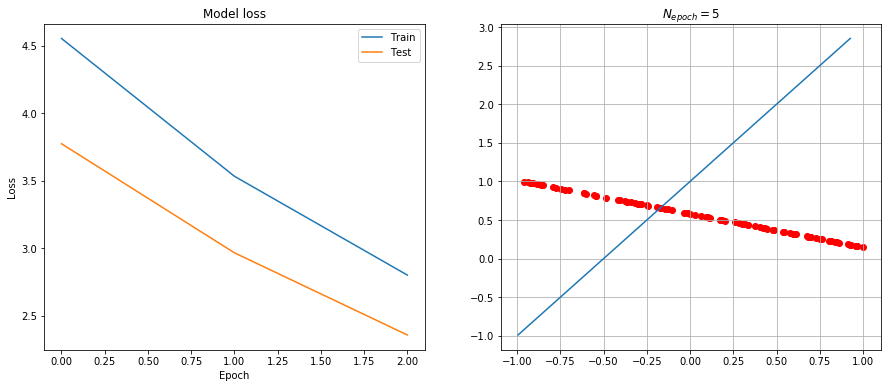

In [40]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
print('_____N_epoch=30____')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
  

plt.subplot(122)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('$N_{epoch}=30$')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
print('____N_epoch=100____')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

plt.subplot(122)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('$N_{epoch}=100$')
plt.show()

fig=plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
print('____N_epoch=5____')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

plt.subplot(122)
plt.scatter(x_predicted3, y_predicted3,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('$N_{epoch}=5$')
plt.show()

### Ntrain

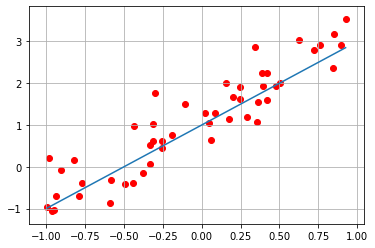

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 1ms/sample - loss: 1.6751 - mae: 1.0377 - val_loss: 1.5481 - val_mae: 1.0379
Epoch 2/30
500/500 [==============================] - 0s 208us/sample - loss: 1.2106 - mae: 0.8811 - val_loss: 1.1617 - val_mae: 0.9018
Epoch 3/30
500/500 [==============================] - 0s 223us/sample - loss: 0.9282 - mae: 0.7644 - val_loss: 0.9059 - val_mae: 0.7939
Epoch 4/30
500/500 [==============================] - 0s 285us/sample - loss: 0.7424 - mae: 0.6806 - val_loss: 0.7379 - val_mae: 0.7145
Epoch 5/30
500/500 [==============================] - 0s 272us/sam

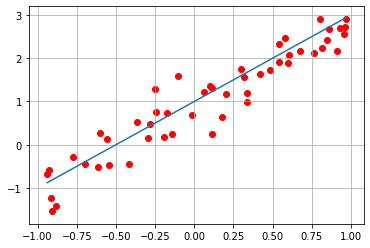

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 50 samples
Epoch 1/30
100/100 [==============================] - 1s 14ms/sample - loss: 2.4746 - mae: 1.2800 - val_loss: 1.7443 - val_mae: 1.1192
Epoch 2/30
100/100 [==============================] - 0s 1ms/sample - loss: 2.2515 - mae: 1.2205 - val_loss: 1.5641 - val_mae: 1.0580
Epoch 3/30
100/100 [==============================] - 0s 970us/sample - loss: 2.0605 - mae: 1.1662 - val_loss: 1.3791 - val_mae: 0.9925
Epoch 4/30
100/100 [==============================] - 0s 786us/sample - loss: 1.8671 - mae: 1.1127 - val_loss: 1.2664 - val_mae: 0.9507
Epoch 5/30
100/100 [==============================] - 0s 1ms/sample

In [52]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent





y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
plt.plot(x_valid, y_target) # plot training and target dataset
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show()
   

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
batch_size=32, epochs=30,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###########################################################################
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
plt.plot(x_valid, y_target) # plot training and target dataset
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show()

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mae'])
# get a summary of our composed model
model2.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train, y=y_train, 
batch_size=32, epochs=30,
shuffle=True, # a good idea is to shuffle input before at each epoch
validation_data=(x_valid, y_valid))
# evaluate model
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


_____N_train=500____
Test loss: 0.277109169960022
Test accuracy: 0.40847352


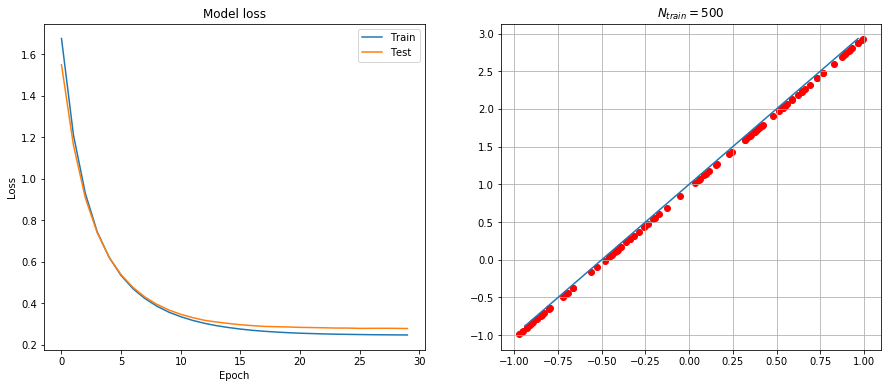

____N_train=100____
Test loss: 0.23171865284442902
Test accuracy: 0.38141114


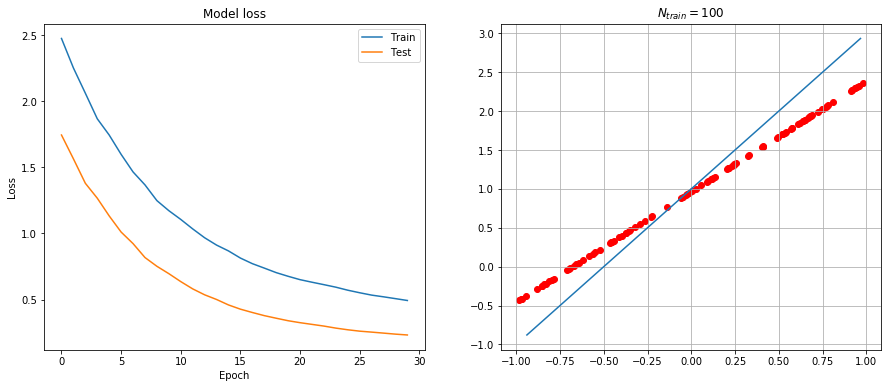

In [54]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
print('_____N_train=500____')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
  

plt.subplot(122)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('$N_{train}=500$')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='best')
print('____N_train=100____')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

plt.subplot(122)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title('$N_{train}=100$')
plt.show()


Anche se la $\sigma$ viene modificata di molto la rete sembra non risentirne, quello che maggiormente ne determina le performance sono $N_{train}$ che non può essere troppo piccolo così come $N_{epoch}$.

### Es 11.2

Ora si va a compiere un fit sulla funzione polinomiale $$f(x)=3x^3-2x^2-3x+4$$ nell'intervallo $ [-1,1]$, in questo caso la rete è costituita da un layer con $200$ neuroni, un layer con $45$ neuroni e un layer con un solo elemento.

Anche in questo caso si osserva come cambia il fit in base al numero di layer, al numero diverso di neuroni,alla funzione di attivazione e all'ottimizzatore

In [238]:

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4-3*x_train-2*x_train**2+3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid**2+3*x_valid**3, sigma)

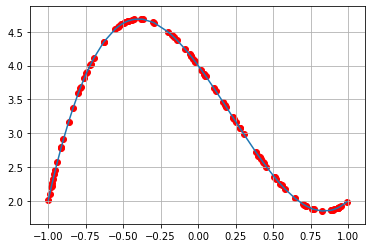

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_302 (Dense)            (None, 45)                9045      
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 46        
Total params: 9,491
Trainable params: 9,491
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.5644 - mse: 1.5644 - val_loss: 0.5645 - val_mse: 0.5645
Epoch 2/50
1000/1000 [==============================] - 1s 835us/sample - loss: 0.3021 - mse: 0.3021 - val_loss: 0.4336 - val_mse: 0.4336
Epoch 3/50
1000/1000 [==============================] - 1s 

In [239]:
# plot training and target dataset

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation='relu'))

model.add(Dense(45,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


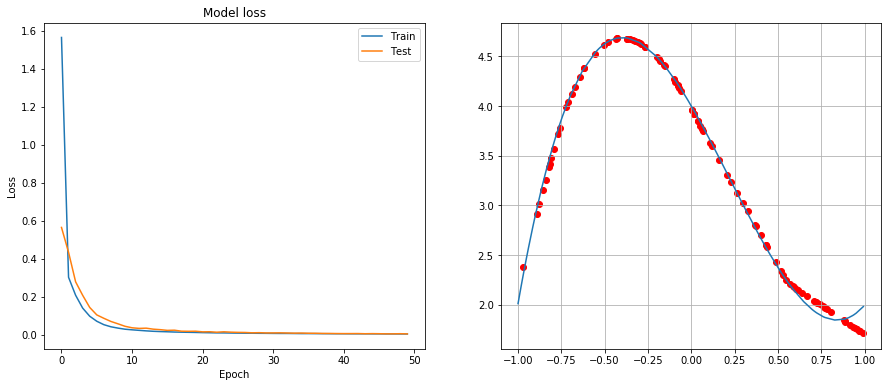

In [240]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

#### modifica layer

In [241]:
#tolgo un layer
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
######################################################
#Aggiungo un layer


model2 = tf.keras.Sequential()
model2.add(Dense(200, input_shape=(1,), activation='relu'))
model2.add(Dense(100, input_shape=(1,), activation='relu'))
model2.add(Dense(45,activation='relu'))
model2.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model2.summary()

history = model2.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_305 (Dense)            (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.8454 - mse: 1.8454 - val_loss: 0.5625 - val_mse: 0.5625
Epoch 2/50
1000/1000 [==============================] - 1s 706us/sample - loss: 0.3686 - mse: 0.3686 - val_loss: 0.5001 - val_mse: 0.5001
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3101 - mse: 0.3101 - val_loss: 0.4614 - val_mse: 0.4614
Epoch 4/50
1000/1000 [==============================] - 1s 1m

1000/1000 [==============================] - 2s 2ms/sample - loss: 1.3861 - mse: 1.3861 - val_loss: 0.5124 - val_mse: 0.5124
Epoch 2/50
1000/1000 [==============================] - 1s 845us/sample - loss: 0.2743 - mse: 0.2743 - val_loss: 0.3436 - val_mse: 0.3436
Epoch 3/50
1000/1000 [==============================] - 1s 952us/sample - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1879 - val_mse: 0.1879
Epoch 4/50
1000/1000 [==============================] - 1s 775us/sample - loss: 0.0864 - mse: 0.0864 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 5/50
1000/1000 [==============================] - 1s 741us/sample - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 6/50
1000/1000 [==============================] - 1s 732us/sample - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 8/50
1000/1000 [===========================

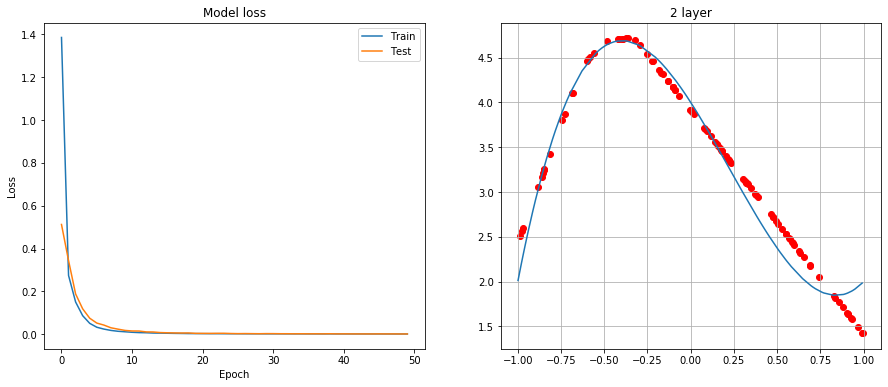

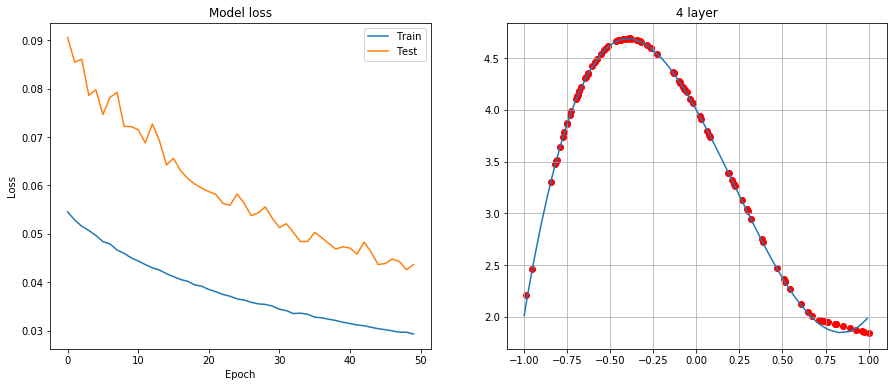

In [242]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('2 layer')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.title('4 layer')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


la struttura della rete a tre layer sembra essere la migliore infatti abbassando a due si ottiene un fit costituito da rette, mentre con un numero superiore non si riscontrano differenze sostanziali.

### modifica numero neuroni

In [243]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))

model.add(Dense(2,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
###################################################################
model2 = tf.keras.Sequential()
model2.add(Dense(5, input_shape=(1,), activation='relu'))

model2.add(Dense(2,activation='relu'))
model2.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model2.summary()

history = model2.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_310 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_311 (Dense)            (None, 2)                 22        
_________________________________________________________________
dense_312 (Dense)            (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/sample - loss: 3.9064 - mse: 3.9064 - val_loss: 1.0256 - val_mse: 1.0256
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7660 - mse: 0.7660 - val_loss: 0.5111 - val_mse: 0.5111
Epoch 3/50
1000/1000 [==============================] - 1s 985us/sa

1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1070 - mse: 1.1070 - val_loss: 0.7727 - val_mse: 0.7727
Epoch 2/50
1000/1000 [==============================] - 1s 558us/sample - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6997 - val_mse: 0.6997
Epoch 3/50
1000/1000 [==============================] - 1s 511us/sample - loss: 0.4038 - mse: 0.4038 - val_loss: 0.5033 - val_mse: 0.5033
Epoch 4/50
1000/1000 [==============================] - 1s 547us/sample - loss: 0.2894 - mse: 0.2894 - val_loss: 0.3580 - val_mse: 0.3580
Epoch 5/50
1000/1000 [==============================] - 1s 696us/sample - loss: 0.1828 - mse: 0.1828 - val_loss: 0.2223 - val_mse: 0.2223
Epoch 6/50
1000/1000 [==============================] - 1s 663us/sample - loss: 0.1124 - mse: 0.1124 - val_loss: 0.1442 - val_mse: 0.1442
Epoch 7/50
1000/1000 [==============================] - 1s 898us/sample - loss: 0.0714 - mse: 0.0714 - val_loss: 0.0948 - val_mse: 0.0948
Epoch 8/50
1000/1000 [=========================

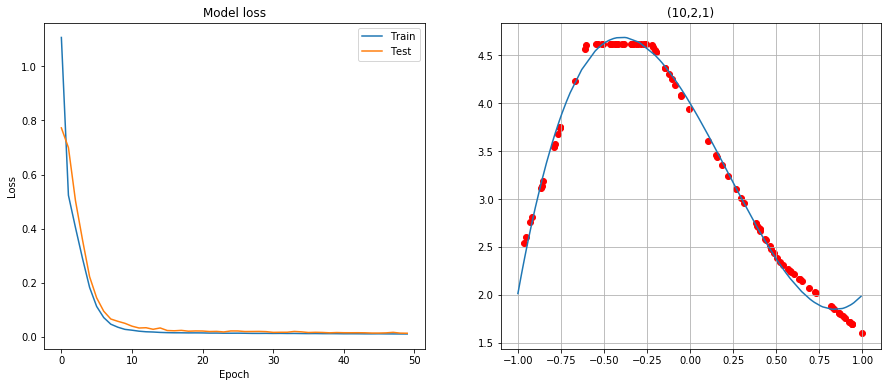

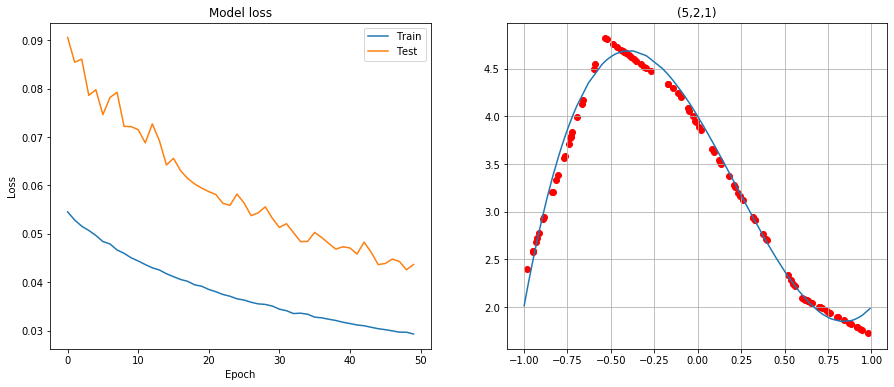

In [244]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('(10,2,1)')
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('(5,2,1)')
plt.grid(True)
plt.show()


il numero più basso di neuroni che permette un buon fit sono: $10$ neuroni nel primo layer $2$ nel secondo e solo uno nel terzo, infatti abbassando il numero di neuroni del primo layer si riscontrano dei problemi.  

### activation function

In [116]:
model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation='softplus'))

model.add(Dense(45,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_233 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_234 (Dense)            (None, 45)                9045      
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 46        
Total params: 9,491
Trainable params: 9,491
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/80
1000/1000 [==============================] - 1s 940us/sample - loss: 1.7098 - mse: 1.7098 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 2/80
1000/1000 [==============================] - 1s 589us/sample - loss: 0.8204 - mse: 0.8204 - val_loss: 0.7691 - val_mse: 0.7691
Epoch 3/80
1000/1000 [==============================] - 0s

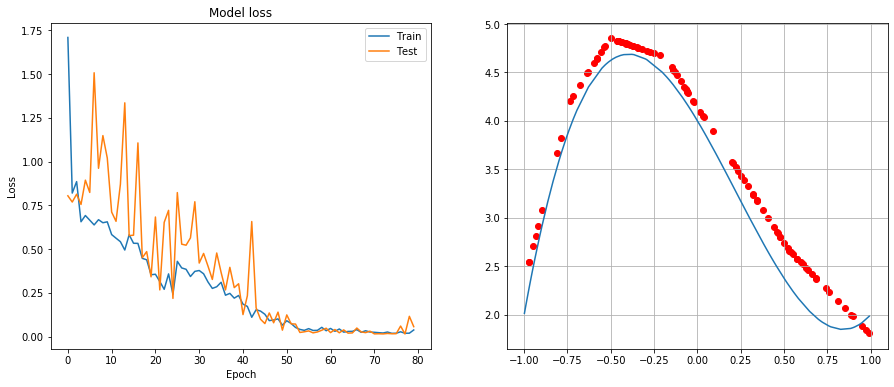

In [117]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


In [114]:
model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation='selu'))

model.add(Dense(45,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_230 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_231 (Dense)            (None, 45)                9045      
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 46        
Total params: 9,491
Trainable params: 9,491
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 1s 925us/sample - loss: 1.1503 - mse: 1.1503 - val_loss: 0.5116 - val_mse: 0.5116
Epoch 2/50
1000/1000 [==============================] - 1s 541us/sample - loss: 0.2788 - mse: 0.2788 - val_loss: 0.4402 - val_mse: 0.4402
Epoch 3/50
1000/1000 [==============================] - 1s

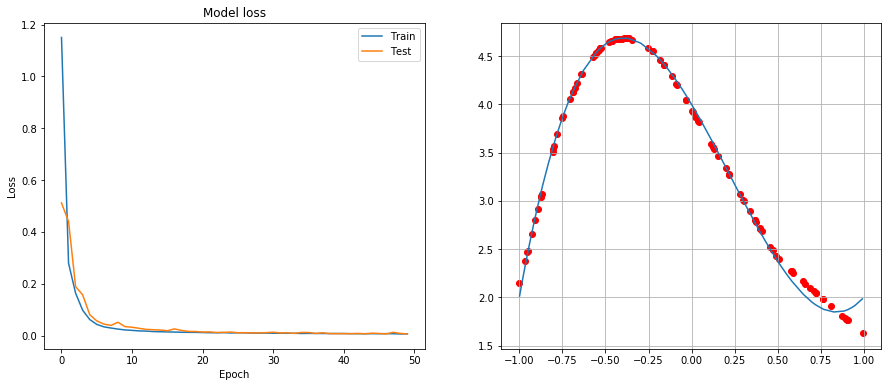

In [115]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


Come funzione di attivazione del primo layer viene usata per prima "softplus" e come seconda "selu", si osserva un migliore comportamento della seconda.

### ottimizzatore

In [119]:
model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation='relu'))

model.add(Dense(45,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_239 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_240 (Dense)            (None, 45)                9045      
_________________________________________________________________
dense_241 (Dense)            (None, 1)                 46        
Total params: 9,491
Trainable params: 9,491
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 9.8618 - mse: 9.8618 - val_loss: 7.3121 - val_mse: 7.3121
Epoch 2/80
1000/1000 [==============================] - 1s 717us/sample - loss: 7.0063 - mse: 7.0064 - val_loss: 5.1769 - val_mse: 5.1769
Epoch 3/80
1000/1000 [==============================] - 1s 8

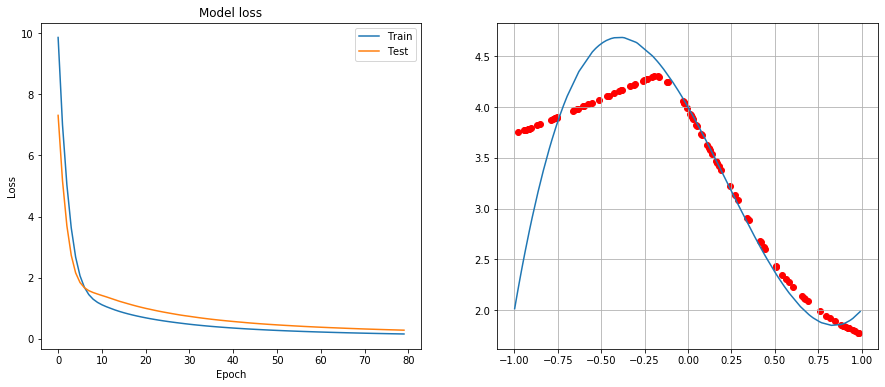

In [120]:
fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


Come ottimizzatore viene usato "Adagrad" che ha un buo comportamento per valori maggiori di zero.

### fuori dal range

In [129]:

model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation='relu'))

model.add(Dense(45,activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=10, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_255 (Dense)            (None, 45)                9045      
_________________________________________________________________
dense_256 (Dense)            (None, 1)                 46        
Total params: 9,491
Trainable params: 9,491
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.3479 - mse: 1.3479 - val_loss: 0.6734 - val_mse: 0.6734
Epoch 2/50
1000/1000 [==============================] - 1s 810us/sample - loss: 0.3775 - mse: 0.3775 - val_loss: 0.5160 - val_mse: 0.5160
Epoch 3/50
1000/1000 [==============================] - 1s 6

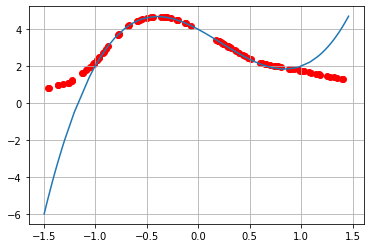

In [133]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)

y_predicted = model.predict(x_predicted)

x = np.random.uniform(-1.5, 1.5, 100)

x.sort()
y = 4-3*x-2*x**2+3*x**3 # ideal (target) linear function

plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x, y)
plt.grid(True)
plt.show()

Come si osserva da questo esempio la rete neurale è completamente inefficace se si cerca di predire il comportamento della funzione fuori dall'intervallo.

### Es 11.3

Per concludere si compie un fit con la funzione  $$f(x,y) = \sin(x^2+y^2)$$ nel dominio  $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

è stata usata una rete con tre layer da $500$,$300$ e un neurone, che si è allenata con $2000$ valori di train e $100$ di validation con un rumore gaussiano di $0.5$. Di seguito sono riportati i grafici di apprendimento e il risultato in 2 e 3 dimensioni.

In [245]:
import math
x_train = np.random.uniform(-3/2, 3/2 , 2000)
x_valid = np.random.uniform(-3/2,3/2, 100)

y_train = np.random.uniform(-3/2, 3/2 , 2000)
y_valid = np.random.uniform(-3/2,3/2, 100)

x_valid.sort()

z_target = np.zeros(len(x_train))
z_valid = np.zeros(len(x_valid))

for i in range (0,len(z_target)):
    z_target[i]=math.sin(x_train[i] **2 + y_train[i] **2)

for i in range (0,len(z_valid)):
    z_valid[i]=math.sin(x_valid[i] **2 + y_valid[i] **2)


sigma = 0.5 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(z_target, sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(z_valid, sigma)

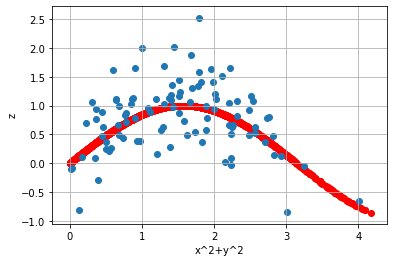

In [246]:
plt.scatter(x_train**2+ y_train**2,z_target,color='r')
plt.scatter(x_valid**2+y_valid**2,z_valid)
plt.grid(True)
plt.xlabel('x^2+y^2')
plt.ylabel('z')
plt.show()

In [247]:
matr_train=np.zeros(( len(z_train),2))
matr_valid=np.zeros((len(z_valid),2))

for i in range (0,len(z_train)):
    matr_train[i][0]=x_train[i]
    matr_train[i][1]=y_train[i]
    
for i in range (0,len(z_valid)):
    matr_valid[i][0]=x_valid[i]
    matr_valid[i][1]=y_valid[i]

In [248]:
model = tf.keras.Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
'''model.add(Dense(10,activation='linear'))
model.add(Dense(10,activation='linear'))
model.add(Dense(1,activation='linear'))
'''
model.add(Dense(300,activation='relu'))


model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(matr_train, z_train,
          batch_size=50, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(matr_valid, z_valid))




Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 500)               1500      
_________________________________________________________________
dense_317 (Dense)            (None, 300)               150300    
_________________________________________________________________
dense_318 (Dense)            (None, 1)                 301       
Total params: 152,101
Trainable params: 152,101
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 100 samples
Epoch 1/200
2000/2000 [==============================] - 1s 611us/sample - loss: 0.4639 - mse: 0.4639 - val_loss: 0.3808 - val_mse: 0.3808
Epoch 2/200
2000/2000 [==============================] - 1s 346us/sample - loss: 0.3898 - mse: 0.3898 - val_loss: 0.3624 - val_mse: 0.3624
Epoch 3/200
2000/2000 [============================

Epoch 54/200
2000/2000 [==============================] - 1s 286us/sample - loss: 0.3307 - mse: 0.3307 - val_loss: 0.2994 - val_mse: 0.2994
Epoch 55/200
2000/2000 [==============================] - 1s 297us/sample - loss: 0.3299 - mse: 0.3299 - val_loss: 0.2944 - val_mse: 0.2944
Epoch 56/200
2000/2000 [==============================] - 1s 359us/sample - loss: 0.3286 - mse: 0.3286 - val_loss: 0.2966 - val_mse: 0.2966
Epoch 57/200
2000/2000 [==============================] - 1s 348us/sample - loss: 0.3278 - mse: 0.3278 - val_loss: 0.2950 - val_mse: 0.2950
Epoch 58/200
2000/2000 [==============================] - 1s 291us/sample - loss: 0.3265 - mse: 0.3265 - val_loss: 0.2917 - val_mse: 0.2917
Epoch 59/200
2000/2000 [==============================] - 0s 221us/sample - loss: 0.3255 - mse: 0.3255 - val_loss: 0.2889 - val_mse: 0.2889
Epoch 60/200
2000/2000 [==============================] - 1s 421us/sample - loss: 0.3247 - mse: 0.3247 - val_loss: 0.2904 - val_mse: 0.2904
Epoch 61/200
2000/20

2000/2000 [==============================] - 1s 446us/sample - loss: 0.2506 - mse: 0.2506 - val_loss: 0.2302 - val_mse: 0.2302
Epoch 171/200
2000/2000 [==============================] - 1s 421us/sample - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2337 - val_mse: 0.2337
Epoch 172/200
2000/2000 [==============================] - 1s 432us/sample - loss: 0.2503 - mse: 0.2503 - val_loss: 0.2355 - val_mse: 0.2355
Epoch 173/200
2000/2000 [==============================] - 1s 368us/sample - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2240 - val_mse: 0.2240
Epoch 174/200
2000/2000 [==============================] - 1s 431us/sample - loss: 0.2494 - mse: 0.2494 - val_loss: 0.2332 - val_mse: 0.2332
Epoch 175/200
2000/2000 [==============================] - 1s 383us/sample - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2319 - val_mse: 0.2319
Epoch 176/200
2000/2000 [==============================] - 1s 399us/sample - loss: 0.2496 - mse: 0.2496 - val_loss: 0.2297 - val_mse: 0.2297
Epoch 177/200
2000/2000 [==

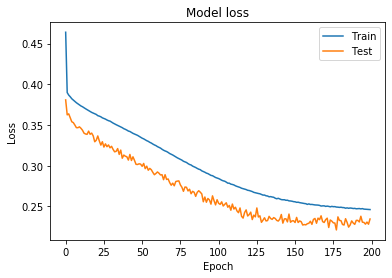

In [249]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



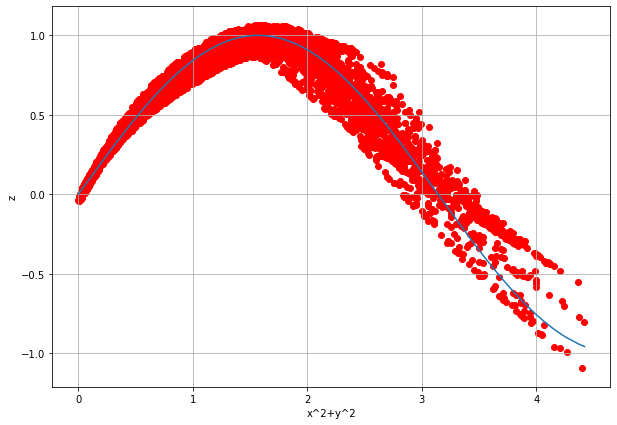

In [250]:

size=5000
matr_predicted=np.zeros(( size,2))

for i in range (0,size):
    matr_predicted[i][0]=np.random.uniform(-3/2,3/2)
    matr_predicted[i][1]=np.random.uniform(-3/2,3/2)



z_predicted = model.predict(matr_predicted)

rho= np.zeros(size)
z2=np.zeros(size)

for i in range (0,size):
    rho[i]=matr_predicted[i][0]**2+matr_predicted[i][1]**2
    
fig = plt.figure(figsize=(10,7))
plt.scatter(rho, z_predicted,color='r')
rho.sort()
for i in range (0,size):
    z2[i]=math.sin(rho[i])
plt.plot(rho,z2)
plt.grid(True)
plt.xlabel('x^2+y^2')
plt.ylabel('z')
plt.show()

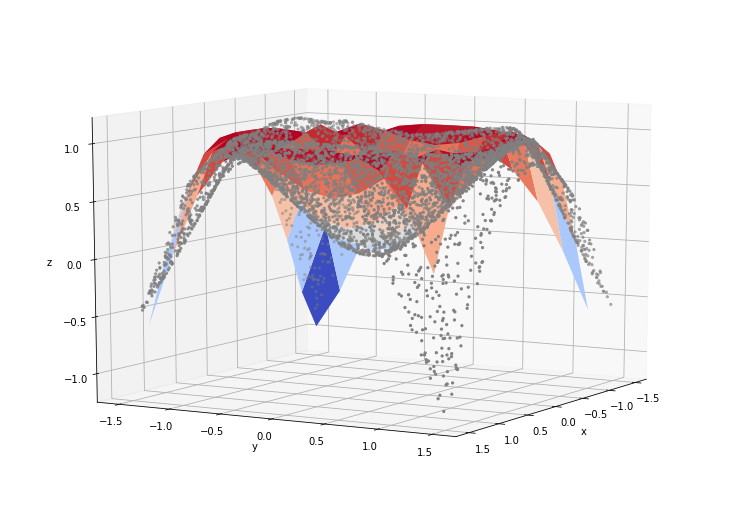

In [251]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x=np.zeros(size)
y=np.zeros(size)
for i in range (0,size):
    x[i]=matr_predicted[i][0]
    y[i]=matr_predicted[i][1]
    
z_predicted = model.predict(matr_predicted)

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(x, y, z_predicted, marker='.',color='grey')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)


# Make data.
X = np.arange(-3/2, 3/2, 0.25)
Y = np.arange(-3/2, 3/2, 0.25)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,edgecolor="none",
                       linewidth=0)




plt.show()

